# EDA


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

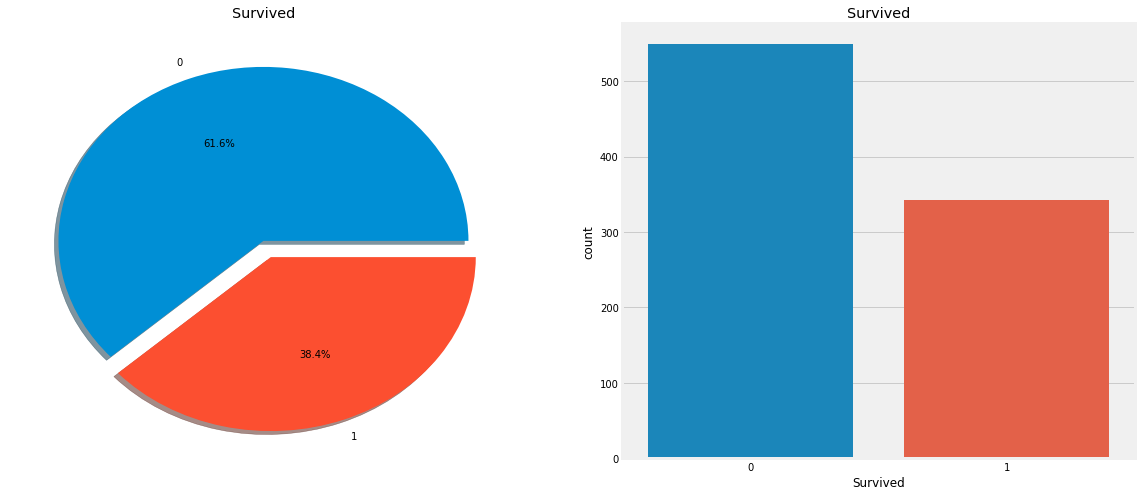

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## Analysing The Features

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

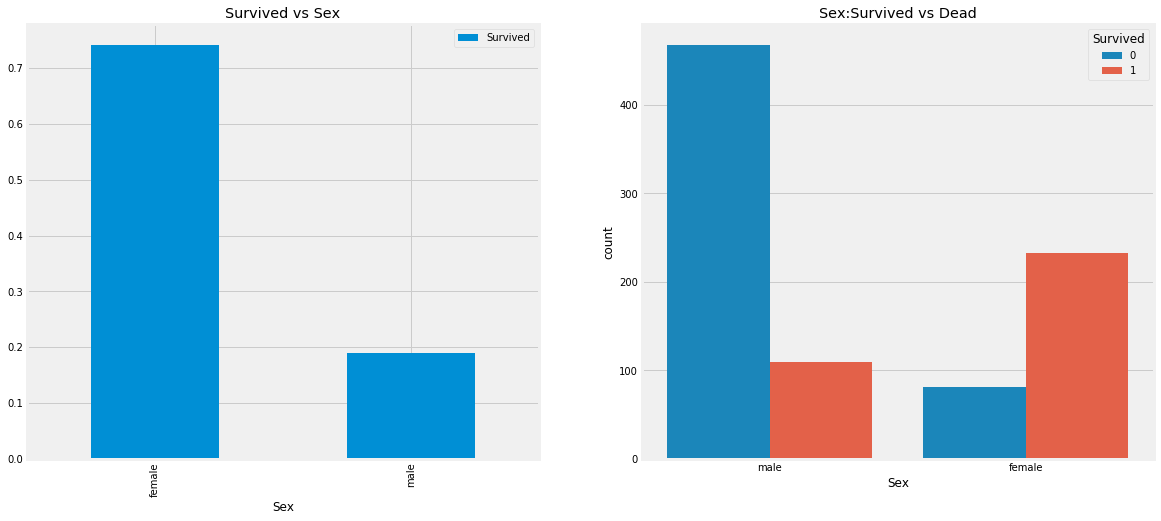

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

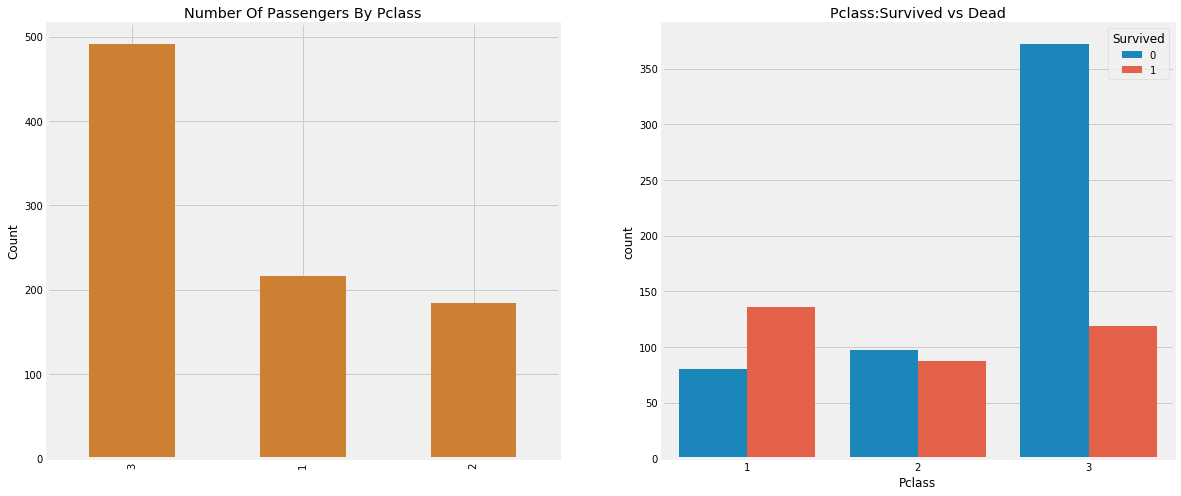

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

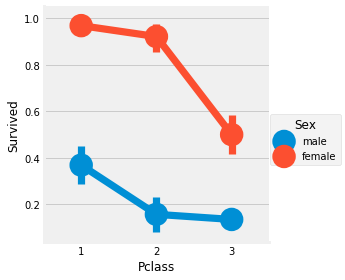

In [11]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

In [12]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


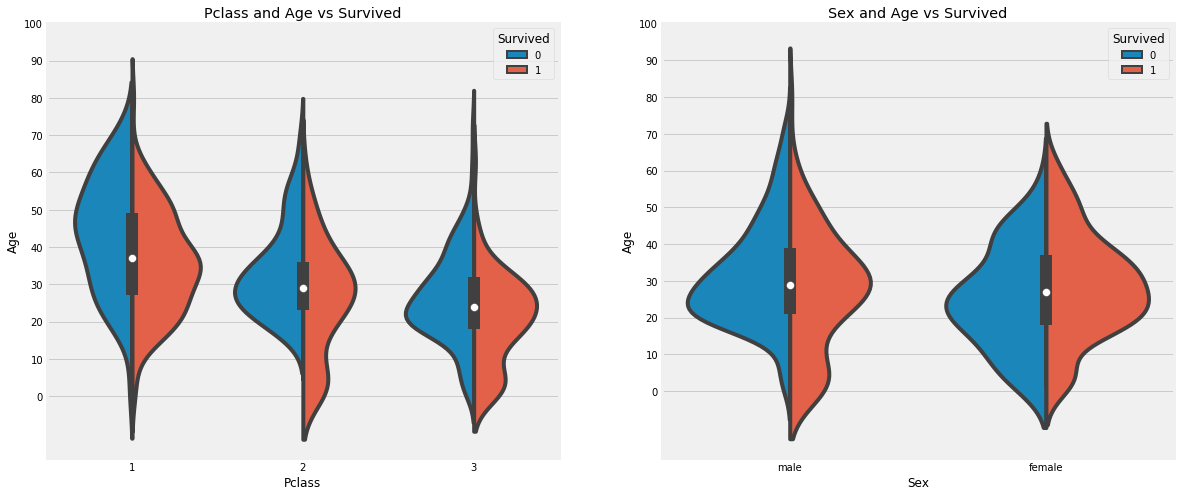

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [15]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [16]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [17]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

Average Age of Initialas

In [19]:
data.groupby('Initial')['Age'].mean() 

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [20]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [21]:
data.Age.isnull().any() 

False

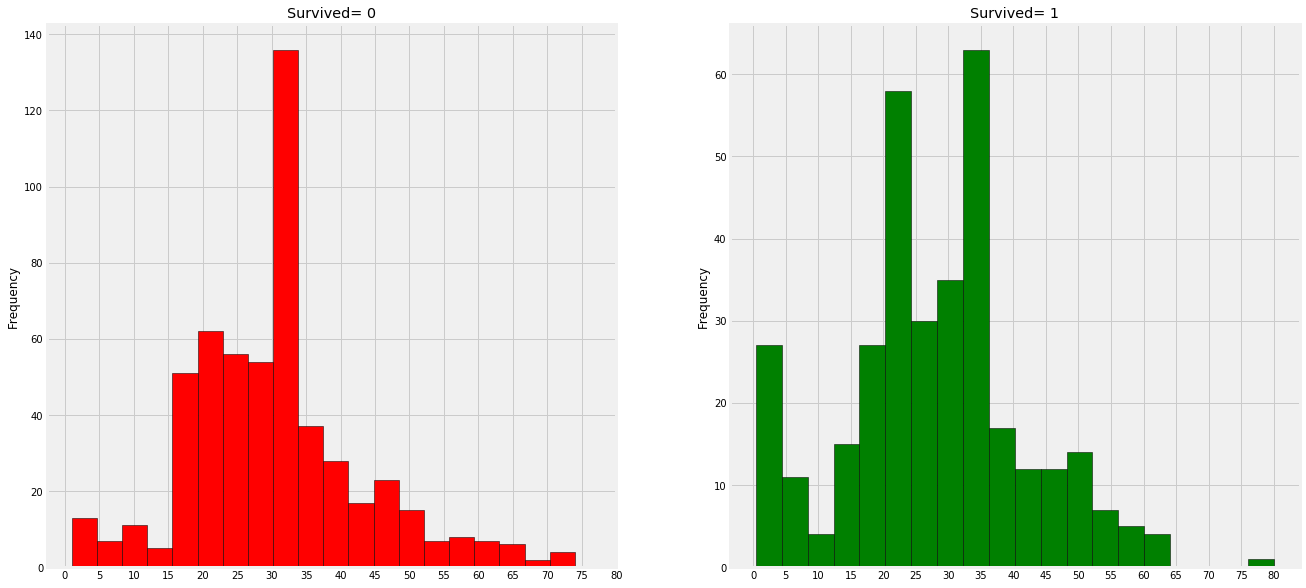

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

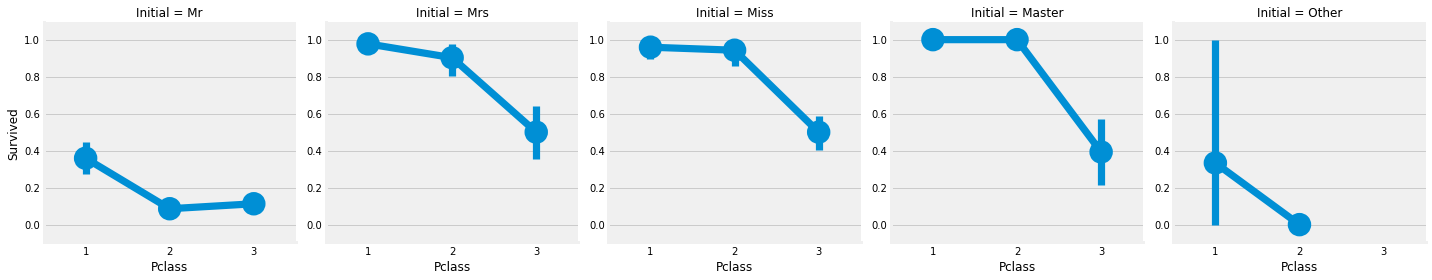

In [23]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

## Embarked--> Categorical Value

### Chances for Survival by Port Of Embarkation

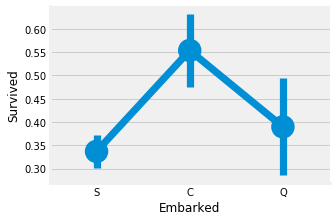

In [25]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

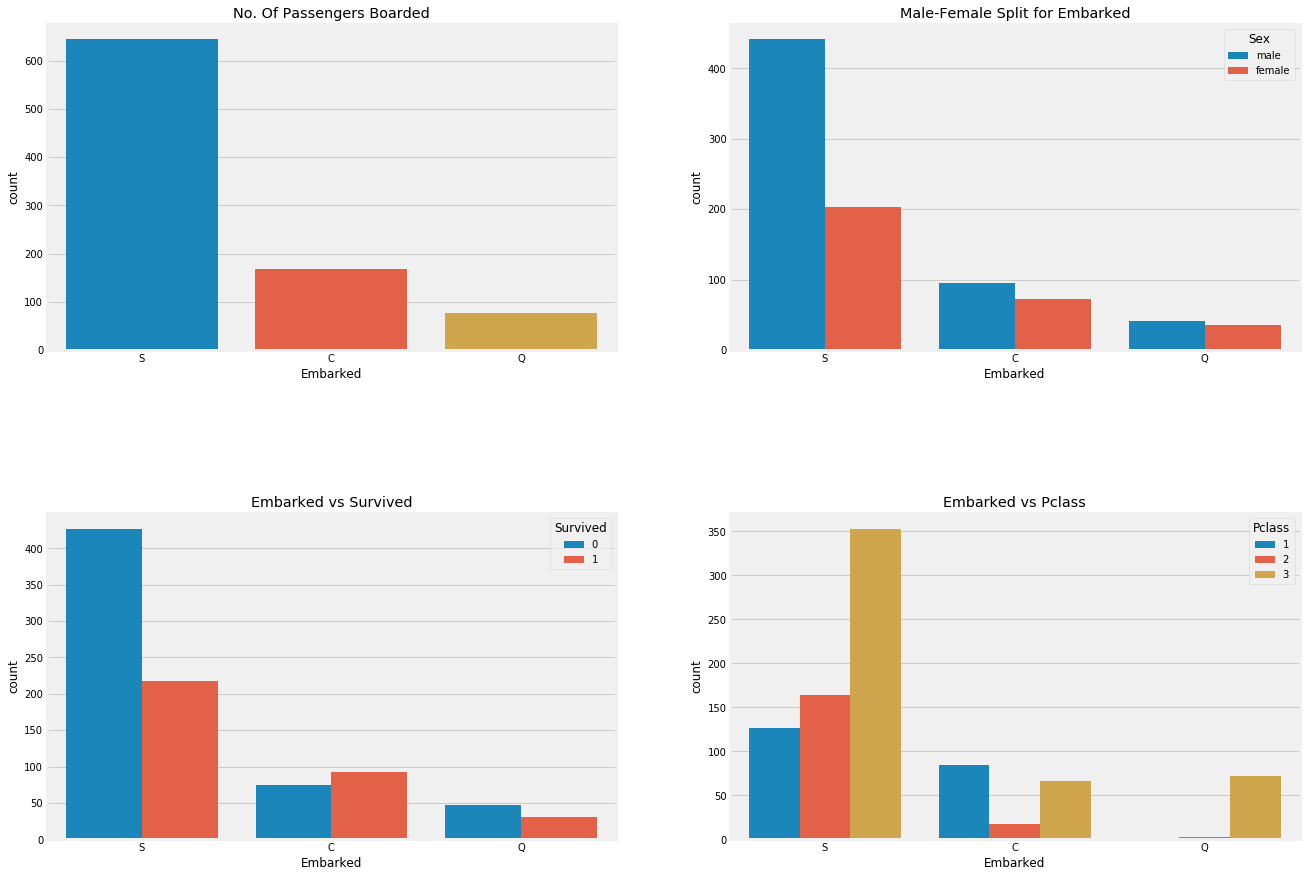

In [26]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

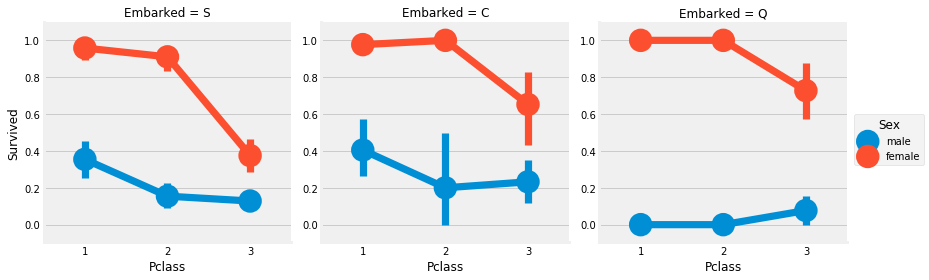

In [27]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

In [28]:
data['Embarked'].fillna('S',inplace=True)

In [29]:
data.Embarked.isnull().any()

False

## Fare--> Continous Feature

In [30]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


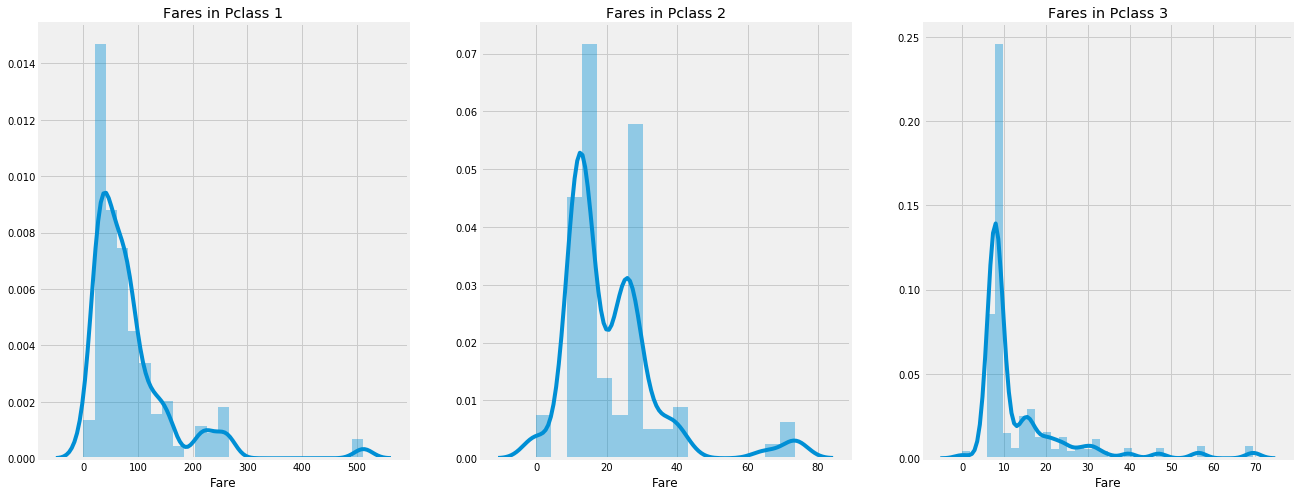

In [31]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

## Correlation Between The Features

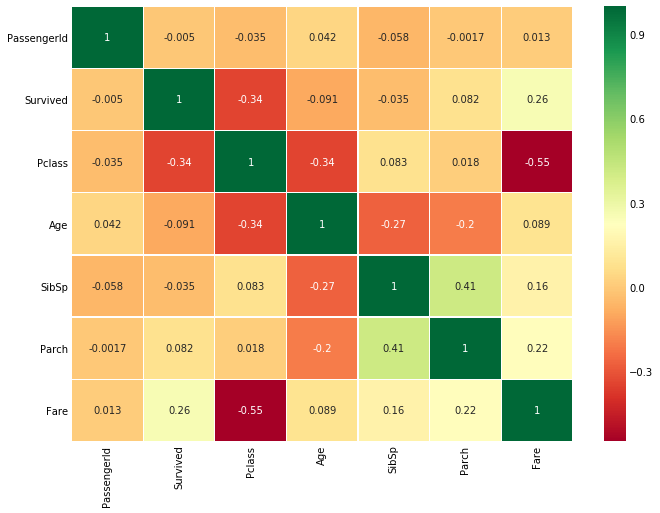

In [32]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## Data Cleaning

In [33]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [34]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


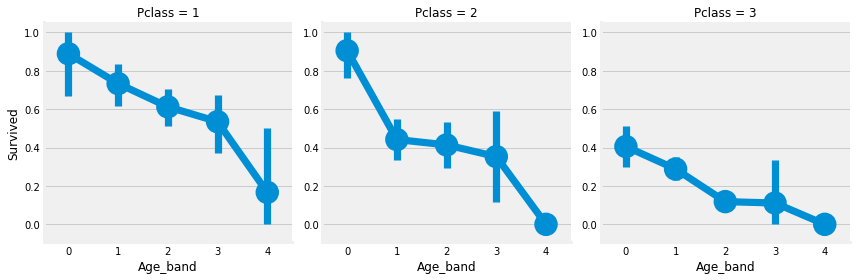

In [35]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

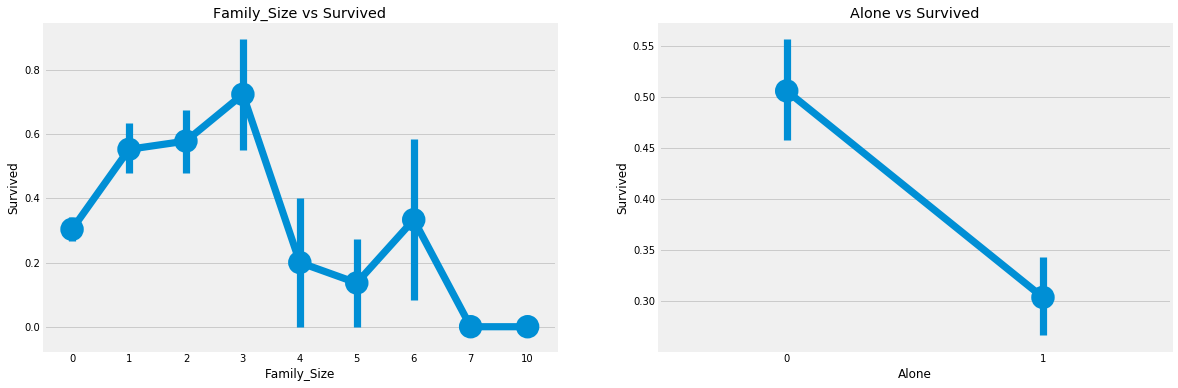

In [36]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

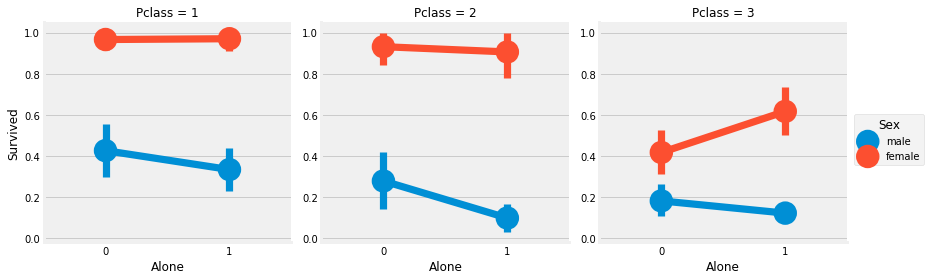

In [37]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

In [38]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [39]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

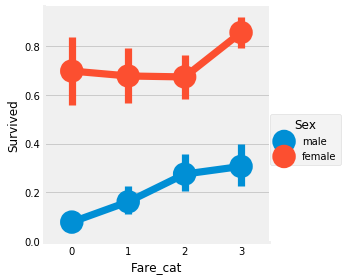

In [40]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

In [41]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### Dropping UnNeeded Features


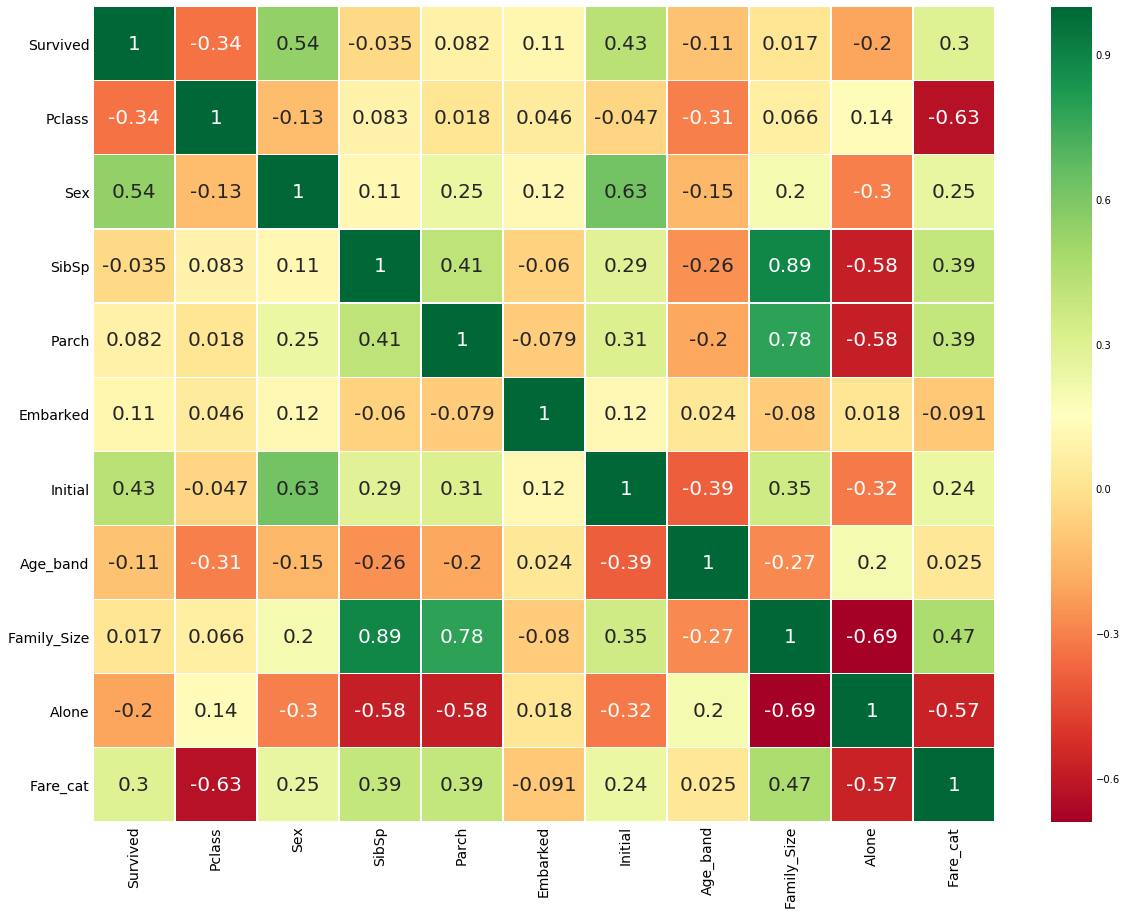

In [42]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Predictiion


1)Logistic Regression

2)Support Vector Machines

3)Random Forest

4)Naive Bayes

5)Decision Tree


In [43]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [44]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

# SVM

In [97]:
model1=svm.SVC(kernel='rbf',C=1,gamma=0.1,probability=True)
model1.fit(train_X,train_Y)
prediction1=model1.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522


In [98]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(test_Y,prediction1))

             precision    recall  f1-score   support

          0       0.83      0.92      0.87       165
          1       0.84      0.71      0.77       103

avg / total       0.84      0.84      0.83       268



Logistic: ROC AUC=0.861


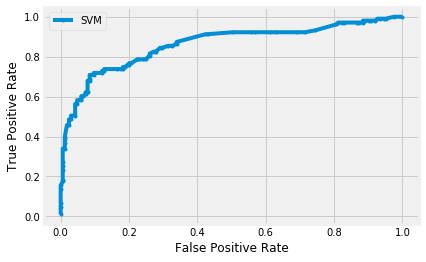

In [99]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pre_probs1 = model1.predict_proba(test_X)

pre_probs1 = pre_probs1[:, 1]

pre_auc = roc_auc_score(test_Y, pre_probs1)

print('Logistic: ROC AUC=%.3f' % (pre_auc))

pre_fpr, pre_tpr, _ = roc_curve(test_Y, pre_probs1)
# plot the roc curve for the model

plt.plot(pre_fpr, pre_tpr, marker='.', label='SVM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


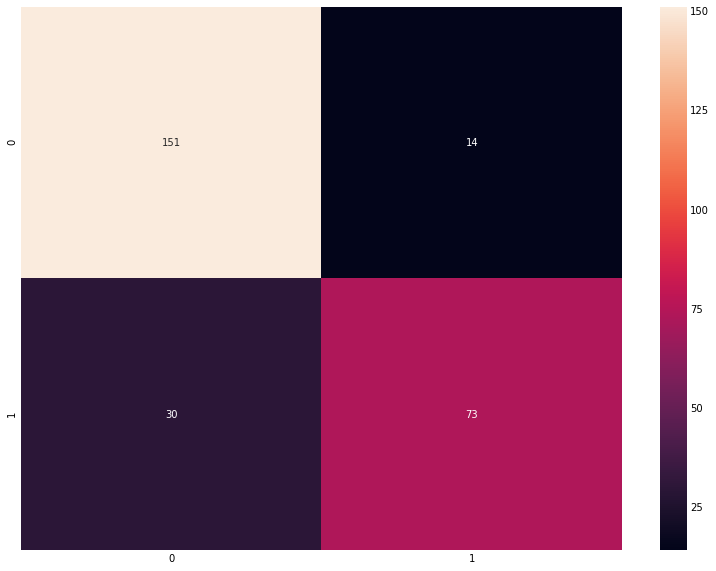

In [100]:
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(confusion_matrix(test_Y,prediction1),annot=True,fmt='2.0f')

### Logistic Regression

In [101]:
model2 = LogisticRegression()
model2.fit(train_X,train_Y)
prediction2=model2.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction2,test_Y))

The accuracy of the Logistic Regression is 0.817164179104


In [102]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(test_Y,prediction2))

             precision    recall  f1-score   support

          0       0.83      0.89      0.86       165
          1       0.80      0.70      0.75       103

avg / total       0.82      0.82      0.81       268



Logistic: ROC AUC=0.865


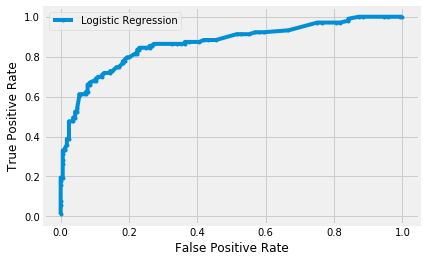

In [103]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pre_probs1 = model2.predict_proba(test_X)

pre_probs1 = pre_probs1[:, 1]

pre_auc = roc_auc_score(test_Y, pre_probs1)

print('Logistic: ROC AUC=%.3f' % (pre_auc))

pre_fpr, pre_tpr, _ = roc_curve(test_Y, pre_probs1)
# plot the roc curve for the model

plt.plot(pre_fpr, pre_tpr, marker='.', label='Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


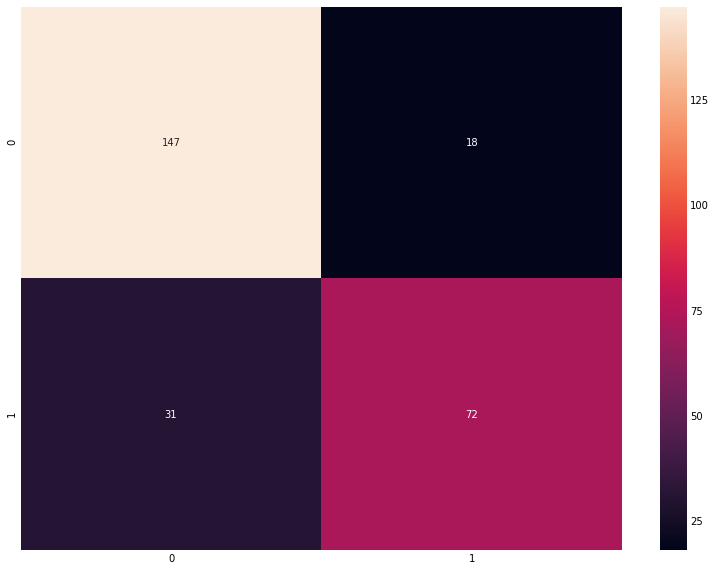

In [104]:
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(confusion_matrix(test_Y,prediction2),annot=True,fmt='2.0f')

### Decision Tree

In [105]:
model3=DecisionTreeClassifier()
model3.fit(train_X,train_Y)
prediction3=model3.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction3,test_Y))


The accuracy of the Decision Tree is 0.805970149254


In [106]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(test_Y,prediction3))

             precision    recall  f1-score   support

          0       0.81      0.90      0.85       165
          1       0.81      0.65      0.72       103

avg / total       0.81      0.81      0.80       268



Decision Tree: ROC AUC=0.790


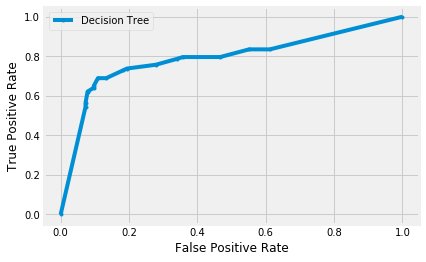

In [107]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pre_probs1 = model3.predict_proba(test_X)

pre_probs1 = pre_probs1[:, 1]

pre_auc = roc_auc_score(test_Y, pre_probs1)

print('Decision Tree: ROC AUC=%.3f' % (pre_auc))

pre_fpr, pre_tpr, _ = roc_curve(test_Y, pre_probs1)
# plot the roc curve for the model

plt.plot(pre_fpr, pre_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


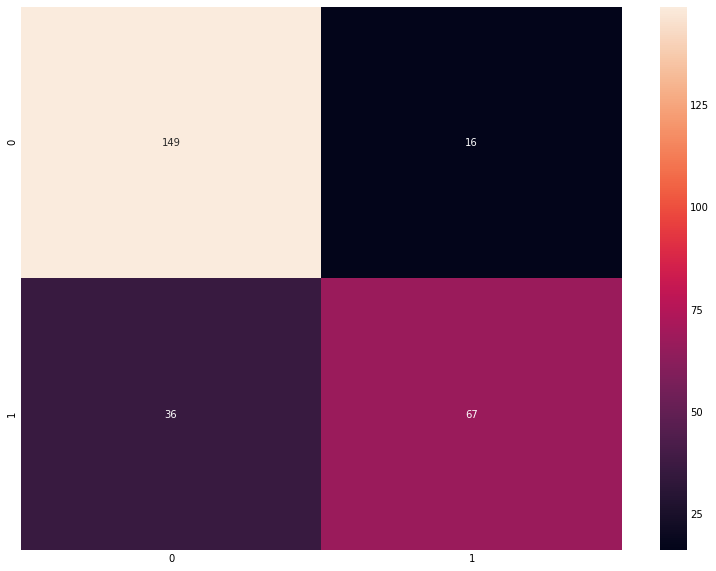

In [108]:
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(confusion_matrix(test_Y,prediction3),annot=True,fmt='2.0f')

### Gaussian Naive Bayes

In [109]:
model4=GaussianNB()
model4.fit(train_X,train_Y)
prediction4=model4.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the NaiveBayes is 0.813432835821


In [110]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(test_Y,prediction4))

             precision    recall  f1-score   support

          0       0.85      0.84      0.85       165
          1       0.75      0.77      0.76       103

avg / total       0.81      0.81      0.81       268



Gaussian Naive Byes: ROC AUC=0.847


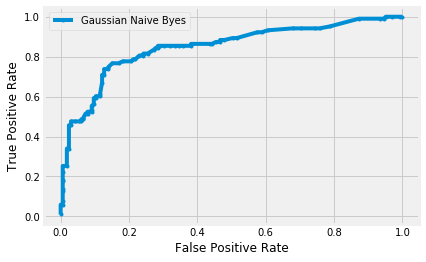

In [111]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pre_probs1 = model4.predict_proba(test_X)

pre_probs1 = pre_probs1[:, 1]

pre_auc = roc_auc_score(test_Y, pre_probs1)

print('Gaussian Naive Byes: ROC AUC=%.3f' % (pre_auc))

pre_fpr, pre_tpr, _ = roc_curve(test_Y, pre_probs1)
# plot the roc curve for the model

plt.plot(pre_fpr, pre_tpr, marker='.', label='Gaussian Naive Byes')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


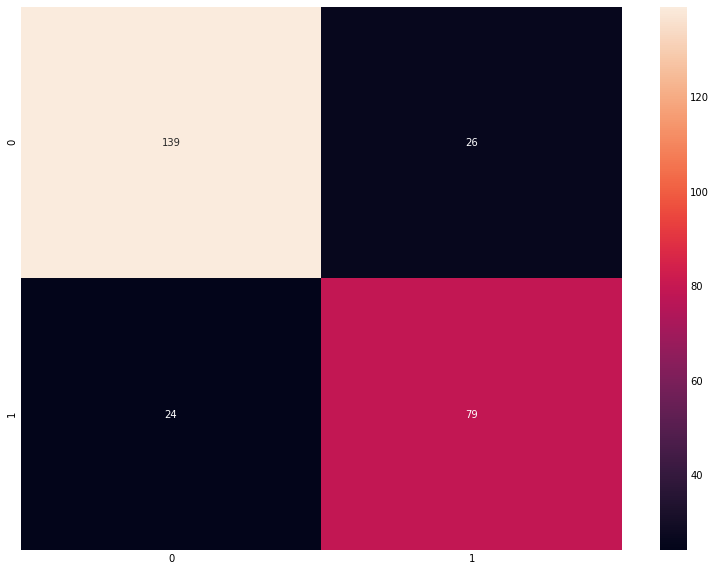

In [112]:
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(confusion_matrix(test_Y,prediction4),annot=True,fmt='2.0f')

### Random Forests

In [113]:
model5=RandomForestClassifier(n_estimators=100)
model5.fit(train_X,train_Y)
prediction5=model5.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the Random Forests is 0.820895522388


In [114]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(test_Y,prediction5))

             precision    recall  f1-score   support

          0       0.82      0.91      0.86       165
          1       0.82      0.68      0.74       103

avg / total       0.82      0.82      0.82       268



Gaussian Naive Byes: ROC AUC=0.850


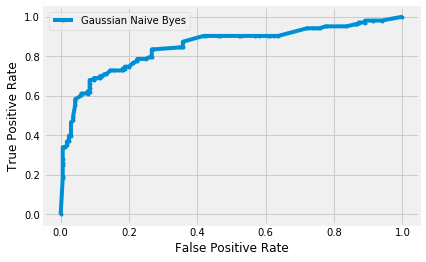

In [116]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pre_probs1 = model5.predict_proba(test_X)

pre_probs1 = pre_probs1[:, 1]

pre_auc = roc_auc_score(test_Y, pre_probs1)

print('Gaussian Naive Byes: ROC AUC=%.3f' % (pre_auc))

pre_fpr, pre_tpr, _ = roc_curve(test_Y, pre_probs1)
# plot the roc curve for the model

plt.plot(pre_fpr, pre_tpr, marker='.', label='Gaussian Naive Byes')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


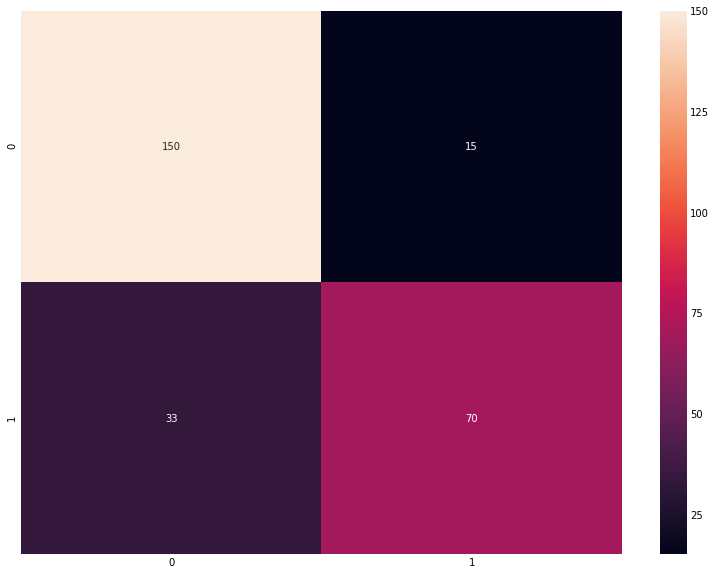

In [115]:
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(confusion_matrix(test_Y,prediction5),annot=True,fmt='2.0f')

In [117]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Svm','Logistic Regression','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Svm,0.828290,0.034427
Logistic Regression,0.805843,0.021861
Decision Tree,0.811473,0.028137
Naive Bayes,0.801386,0.028999
Random Forest,0.814844,0.031678


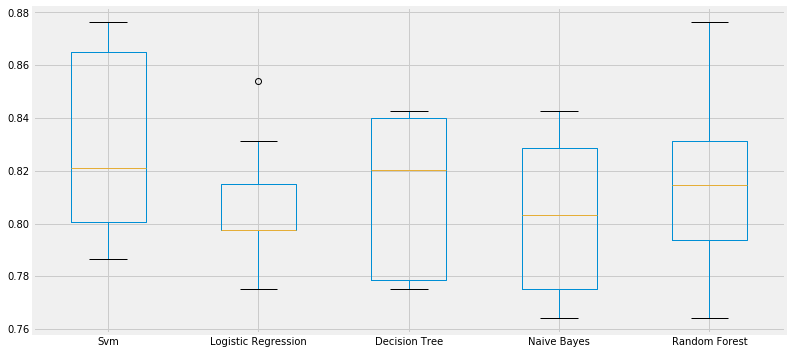

In [118]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

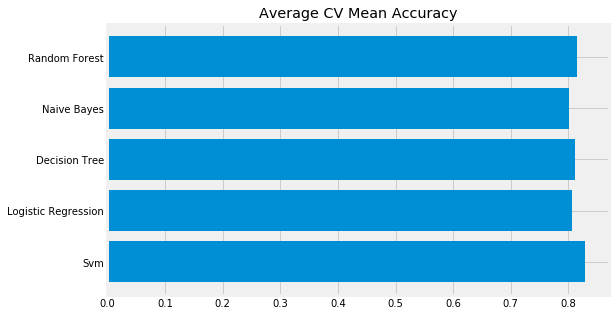

In [119]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()